# 1.Data Validation 

Dataset has **947 rows and 8 columns**, which none of the rows has been removed during the validation. The cleaning steps for each column is as followed:

- **Recipe:** As it has 947 unique values, all integer, it matches what is expected.
- **Calories:** It contained 5.49% missing values that are replaced by the mean of their respective category. (ex. mean of chicken calories) 
- **Carbohydrate:** It contained 5.49% missing values that are replaced by the mean of their respective category.
- **Sugar:** It contained 5.49% missing values that are replaced by the mean of their respective category.
- **Protein:** It contained 5.49% missing values that are replaced by the mean of their respective category.
- **Category:** It contained 11 unique values instead of 10; hence, the inconsistent category of 'chicken breast' is replaced by 'chicken'
- **Servings:** It contained two inconsistent category of "4 as a snack", "6 as a snack" which are replaced by "4","6"
- **High_traffic:** 39.39% was null values. since this column is indicative of high website traffic null values are replaced by 0 and High traffic by 1.

After validation the dataset has still **947 rows and 8 columns**, without missing values.

## 1.1 Data examination

In [1]:
# import python packages

import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Here we read the file 

df = pd.read_csv('recipe_site_traffic_2212.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


Let's look at the data.

In [2]:
# Let's look at the data
df.head(200)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
...,...,...,...,...,...,...,...,...
195,196,336.27,37.38,6.53,23.12,Lunch/Snacks,1,High
196,197,216.10,7.93,1.20,151.64,Chicken,6,NaN
197,198,278.05,9.85,12.93,26.75,Chicken Breast,6,High
198,199,641.05,26.99,1.08,20.20,Meat,1,NaN


Let's describe the data in order to check the variations in numerical columns.

In [3]:
# Numerical data examination
df.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


- From the describe table, we can realize that for all four columns of "calories" to "protein", most of the data (75%) are below the mean. Suggesting the data is skewed to the left. 
- Additionally as the count all columns of "calories" to "protein" are equal and less than 947 (number of rows in original data), we can suspect that there are relations between missing values in these columns. 
- Finally from the high values of standard deviation values we can guess that there are lots of variations in the data.

## 1.2 Checking for Missing Values
See the code for more info as the steps are described in details through commenting.

In [4]:
# To check unique and missing values 

for x in df.columns:
    display(f"Unique in '{x}': {df[x].nunique()}")
    display(f"Missing in '{x}': {np.mean(df[x].isnull())*100:.2f}%, {df[x].isnull().any()}")

"Unique in 'recipe': 947"

"Missing in 'recipe': 0.00%, False"

"Unique in 'calories': 891"

"Missing in 'calories': 5.49%, True"

"Unique in 'carbohydrate': 835"

"Missing in 'carbohydrate': 5.49%, True"

"Unique in 'sugar': 666"

"Missing in 'sugar': 5.49%, True"

"Unique in 'protein': 772"

"Missing in 'protein': 5.49%, True"

"Unique in 'category': 11"

"Missing in 'category': 0.00%, False"

"Unique in 'servings': 6"

"Missing in 'servings': 0.00%, False"

"Unique in 'high_traffic': 1"

"Missing in 'high_traffic': 39.39%, True"

## 1.3 Numerical Data Cleaning
See the code for more info.

In [5]:
# Here we check our theory that null values in ['calories','carbohydrate','sugar', 'protein'] are occuring at the same time
df[df['calories'].isnull()].sum()

recipe                                                      24959
calories                                                      0.0
carbohydrate                                                  0.0
sugar                                                         0.0
protein                                                       0.0
category        PorkMeatChicken BreastMeatPorkChicken BreastDe...
servings        6244662224241644164442644461246241441464144464...
dtype: object

In [6]:
# Creating a reference table to replace null values with their corresponding averages
df_pt=df.pivot_table(index="category", values=['calories','carbohydrate','sugar', 'protein'])
print(df_pt)

                  calories  carbohydrate    protein      sugar
category                                                      
Beverages       177.732174     15.955978   0.594783  12.537283
Breakfast       331.880000     39.711698  16.957170   7.552264
Chicken         566.732029     30.751304  41.843913   5.678261
Chicken Breast  540.338511     21.833191  52.161383   5.098723
Dessert         351.402078     55.661818   5.759870  35.228442
Lunch/Snacks    478.848537     42.820976  19.610976   5.309146
Meat            584.533784     22.159595  40.377027   5.813649
One Dish Meal   579.090000     50.383433  35.926418   6.011642
Pork            629.708082     28.076164  43.797671   8.040137
Potato          425.068554     58.150361   8.574217   3.718916
Vegetable       245.014872     23.679359   7.891923   5.065128


In [7]:
# The missing values in columns calories to protein are replaced with the average of their specific category.
for lab, row in df.iterrows():
    x = row.isnull().calories

    if x:
        cat_index= df.iloc[lab,5]
        df.iloc[lab, 1] = df_pt.loc[cat_index]['calories']
        df.iloc[lab, 2] = df_pt.loc[cat_index]['carbohydrate']
        df.iloc[lab, 3] = df_pt.loc[cat_index]['sugar']
        df.iloc[lab, 4] = df_pt.loc[cat_index]['protein']
        
    else: 
        pass

         
df


,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,629.708082,28.076164,8.040137,43.797671,Pork,6,High
1,2,35.480000,38.560000,0.660000,0.920000,Potato,4,High
2,3,914.280000,42.680000,3.090000,2.880000,Breakfast,1,NaN
3,4,97.030000,30.560000,38.630000,0.020000,Beverages,4,High
4,5,27.050000,1.850000,0.800000,0.530000,Beverages,4,NaN
...,...,...,...,...,...,...,...,...
942,943,1161.000000,5.310000,22.390000,44.220000,Lunch/Snacks,2,NaN
943,944,425.068554,58.150361,3.718916,8.574217,Potato,2,High
944,945,951.740000,29.420000,3.570000,13.870000,Pork,2,High
945,946,266.610000,35.770000,0.970000,8.070000,Potato,6,High


You can see in the dataframe that null values are replaced.

## 1.4 Categorical Data Cleaning
See the commented code for more info.

In [8]:
# Fixing High traffic column
df['high_traffic'] = df['high_traffic'].fillna(0)
df['high_traffic'] = df['high_traffic'].replace("High",1)
# Since the false values are actually low traffic they are replaced with zero and high with one. 

print(df)

     recipe     calories  carbohydrate  ...      category  servings high_traffic
0         1   629.708082     28.076164  ...          Pork         6            1
1         2    35.480000     38.560000  ...        Potato         4            1
2         3   914.280000     42.680000  ...     Breakfast         1            0
3         4    97.030000     30.560000  ...     Beverages         4            1
4         5    27.050000      1.850000  ...     Beverages         4            0
..      ...          ...           ...  ...           ...       ...          ...
942     943  1161.000000      5.310000  ...  Lunch/Snacks         2            0
943     944   425.068554     58.150361  ...        Potato         2            1
944     945   951.740000     29.420000  ...          Pork         2            1
945     946   266.610000     35.770000  ...        Potato         6            1
946     947   184.560000     45.210000  ...     Beverages         4            0

[947 rows x 8 columns]


In [9]:
#  Extra category of chicken breast is replaced with chicken. 
print(df['category'].unique())
df["category"]=df['category'].replace("Chicken Breast", "Chicken")
df['category'].unique()

['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']


array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert'],
      dtype=object)

In [10]:
# Extra categories of Servings are replaced with the correct ones. 
print(df['servings'].unique())
df["servings"]=df['servings'].replace("4 as a snack", "4")
df["servings"]=df['servings'].replace("6 as a snack", "6")
df["servings"].unique()

['6' '4' '1' '2' '4 as a snack' '6 as a snack']


array(['6', '4', '1', '2'], dtype=object)

# 2. Exploratory Analysis

## 2.1 Characteristics of data

As a first step of our analysis, we will look at the distribution of the data. First we will look at categorical data in count-plots and then distribution of numerical values are shown using histograms.

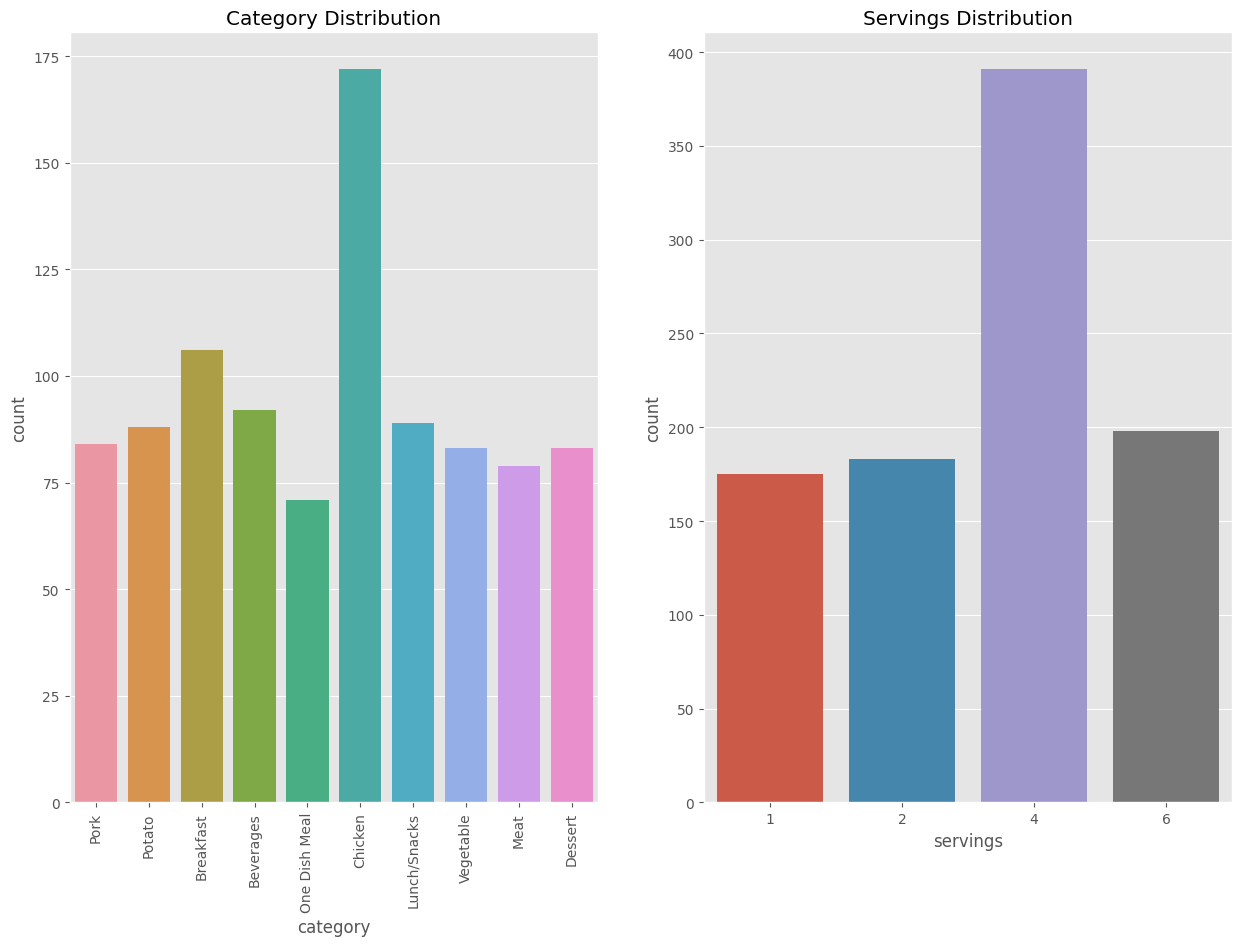

In [11]:
# Categorical Data Distribution
fig, ax = plt.subplots( ncols= 2, figsize=(15, 10))
sns.countplot(x=df['category'], ax =ax[0])
sns.countplot(x=df['servings'].sort_values(), ax =ax[1])
ax[0].set_title('Category Distribution')
ax[1].set_title('Servings Distribution')
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=90)
plt.show()

- We can see that the count most of categories in "category" column are fluctuating around 80, although "breakfast" is a bit higher than 100.
- The only column in "category" with the count of almost twice of the others in "chicken", which is probably because we have combined it with the category of "chicken breast" in order to match what is expected.
- Regarding "servings", we can see that we have twice amount of data for "4" servings in comparison with others, [1,2,6], which they are all almost less than 200.

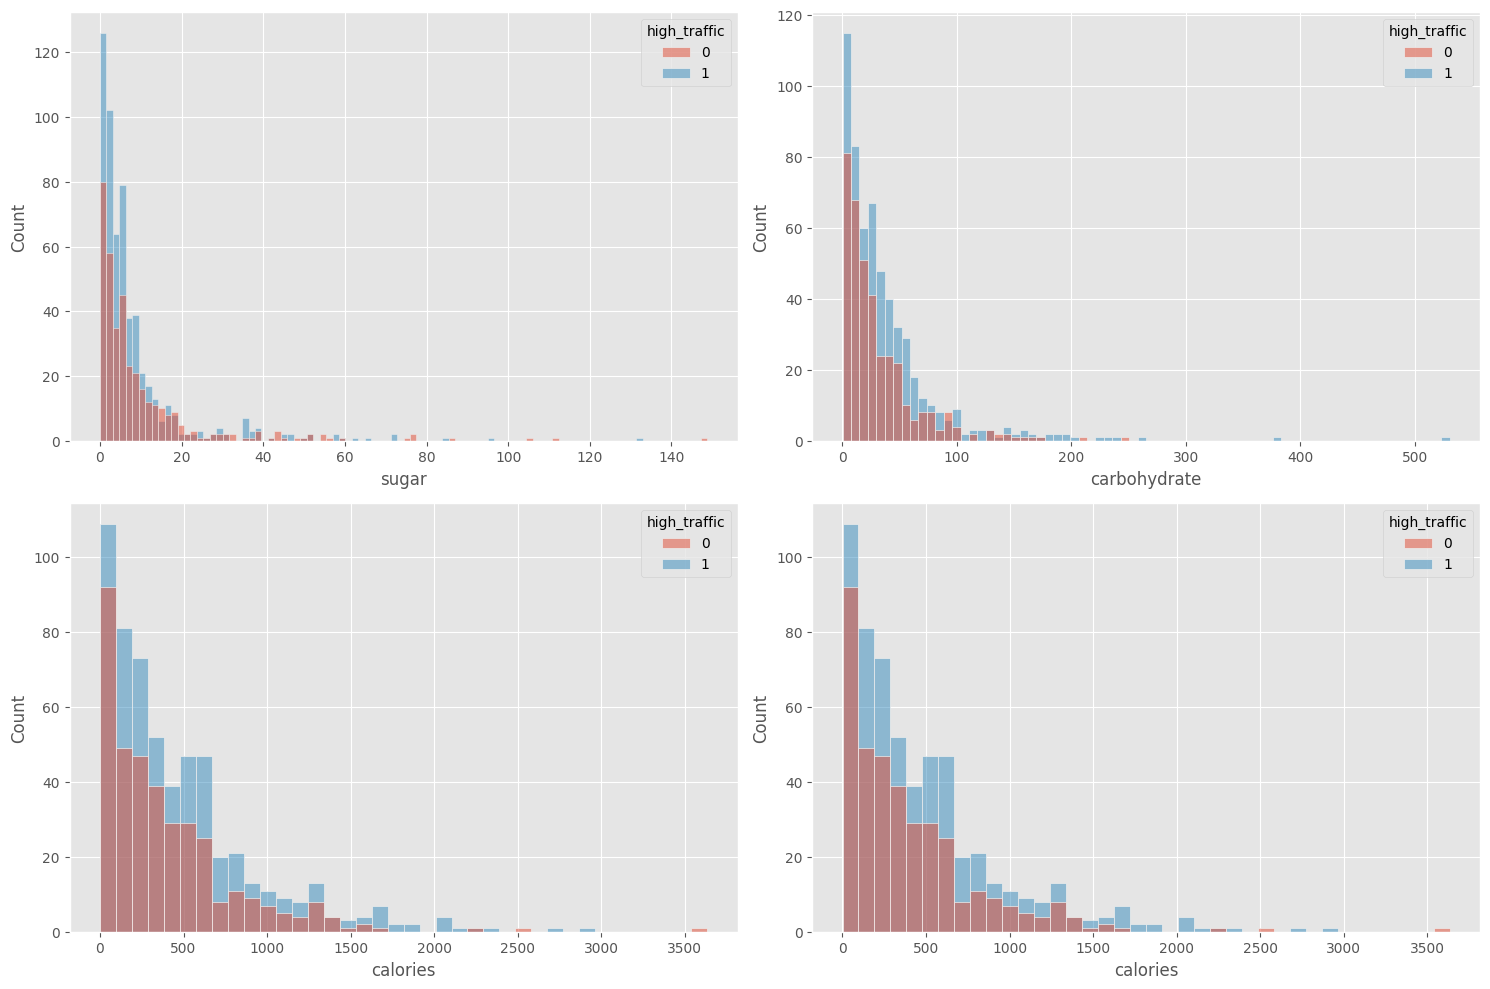

In [12]:
# Numerical Data Distribution

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data=df,x='sugar', ax=axes[0,0], hue="high_traffic")
sns.histplot(data=df,x='carbohydrate', ax=axes[0,1], hue="high_traffic")
sns.histplot(data=df,x='calories', ax=axes[1,0], hue="high_traffic")
sns.histplot(data=df,x='calories', ax=axes[1,1], hue="high_traffic")
#plt.xscale('log')
#plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- In all of the figures above we don't see any normal distribution, but rather in form of **logarithmic decrease**
- As it is expected, those of the recipes that led to high website traffic (indicated by 1, in blue color), are less than those with low website traffic.
- We can also see that the range of data for each of the columns varies.

## 2.2  Relationship between features

First of all we will can have some general understanding of relationship between the features from the pairplot:
- We can see that our numerical data are not closely related.
- We can see that as we get closer to coordination point (origin of graph), the accumulation of data increases significanlty.
- We can see lots of outliers in the data.

In [13]:
df_numerized = df.copy()
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes


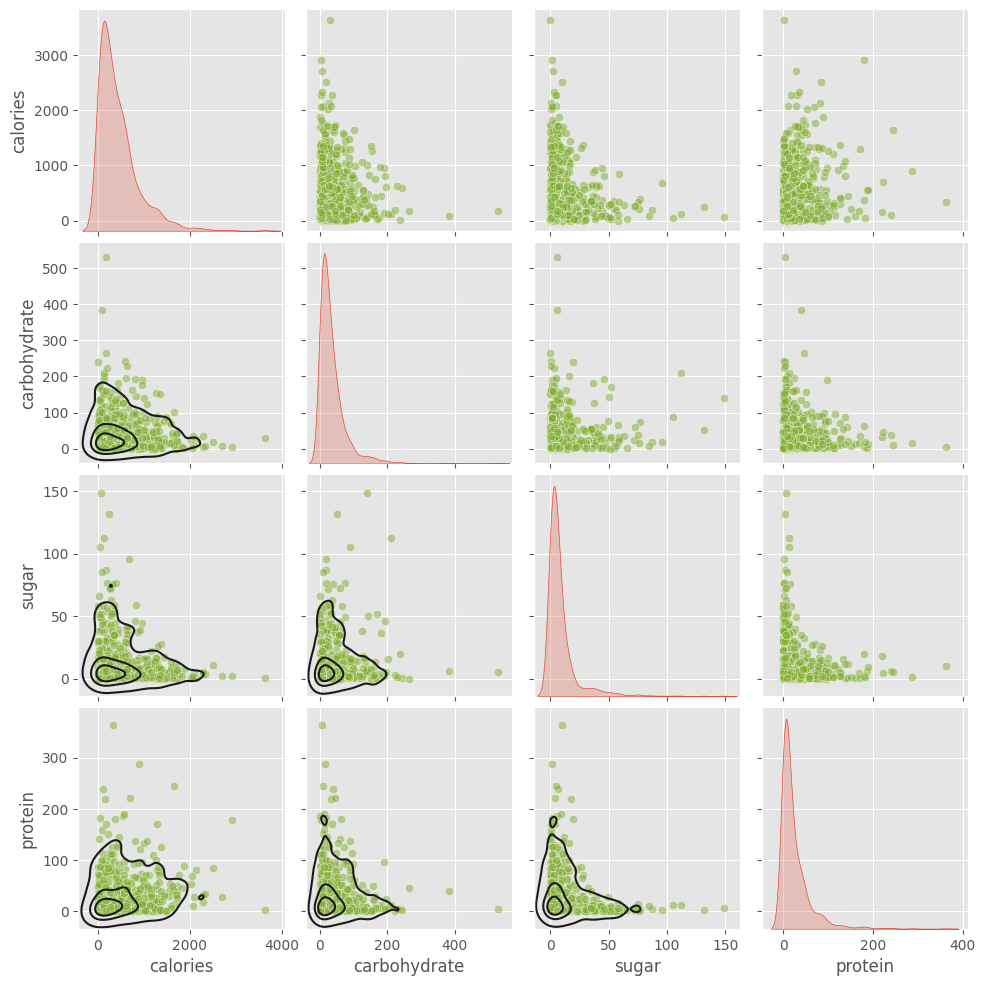

In [14]:
num_cols=['calories', 'carbohydrate', 'sugar', 'protein']
g=sns.pairplot(data=df, x_vars=num_cols, y_vars=num_cols, diag_kind='kde',plot_kws={'alpha': 0.5,'color': '#82ad32'})
g.map_lower(sns.kdeplot, levels=4, color=".1")
# ‘scatter’, ‘kde’, ‘hist’, ‘reg’

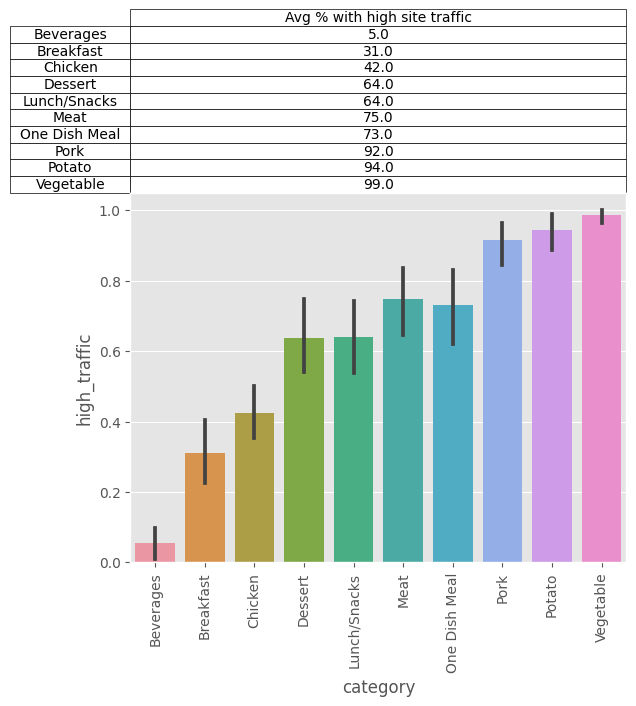

In [15]:
grouped_cat = df.groupby("category")['high_traffic'].mean().round(2) * 100
sns.barplot(data=df, x='category',y="high_traffic", order=grouped_cat.index)
plt.xticks(rotation=90)
grouped_cat2=pd.DataFrame(grouped_cat)
plt.table(cellText=grouped_cat2.values,
          rowLabels=grouped_cat2.index,
          colLabels=["Avg % with high site traffic"],
          cellLoc = 'center', rowLoc = 'center',
          loc='top')

By looking at the relation between "category" and "high_traffic" we can say:
- Top three popular categories with website traffic of above 90% are respectively, "Vegteable", "Potato" and "Pork" dishes.
- "Vegteable" category with website traffic of above 99% stands above all the rest, while "beverages" with the value of 5% has lowest of all, indicating that not being popular.
- Two other poplular categories are "Meat" and "One Dish Meal" with an average of around 75%.

In [16]:
#fig, axes = plt.subplots(2, 2, figsize=(15, 10))
#sns.regplot(data=df_numerized,x='calories', ax=axes[0,0], y="high_traffic",logistic=True, ci=False)
#sns.regplot(data=df_numerized,x='carbohydrate', ax=axes[0,1], y="high_traffic",logistic=True, ci=False)
#sns.regplot(data=df_numerized,x='sugar', ax=axes[1,0], y="high_traffic",logistic=True, ci=False)
#sns.regplot(data=df_numerized,x='protein', ax=axes[1,1], y="high_traffic",logistic=True, ci=False)

<AxesSubplot: xlabel='protein', ylabel='high_traffic'>

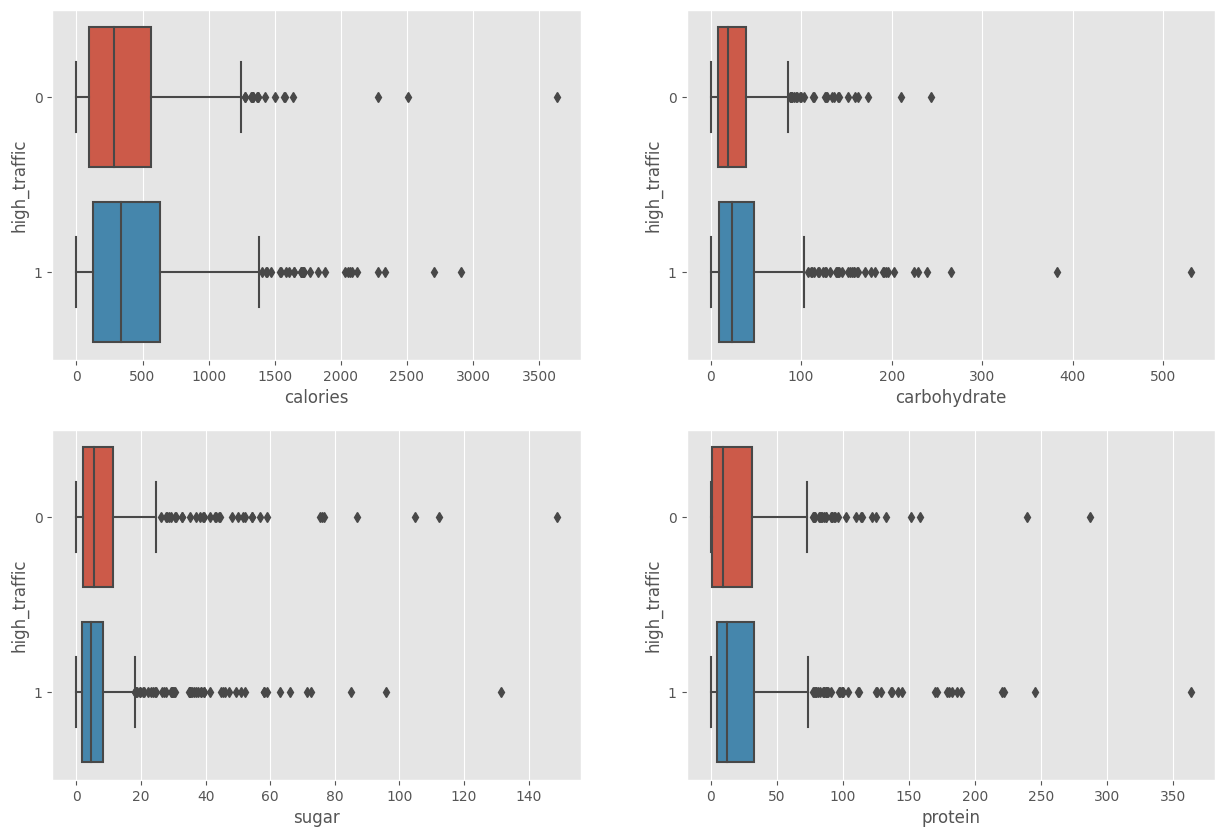

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(data=df,x='calories', y="high_traffic", ax=axes[0,0], orient='h')
sns.boxplot(data=df,x='carbohydrate', y="high_traffic", ax=axes[0,1], orient='h')
sns.boxplot(data=df,x='sugar', y="high_traffic", ax=axes[1,0], orient='h')
sns.boxplot(data=df,x='protein', y="high_traffic", ax=axes[1,1], orient='h')


- We cannot see any significant relation between high traffic and our features
- As it is depcited in boxplots, we can see that IQR in all of our features are relatively small comparing to whiskers, which suggests lots of variability in our data
- We can see lots of data point outside of the whiskers, which denotes that during the modeling we have to make corrections for the outliers

In [18]:
# To check the relation between our numerical columns and
from sklearn import preprocessing

x = df_numerized.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)

dic_columns={}
j=0
for i in df.columns:
    dic_columns[j]= i
    j+=1
df_scaled=df_scaled.rename(columns=dic_columns)

df_scaled[df_scaled['high_traffic']==1].mean().iloc[1:5]*100

calories        12.798900
carbohydrate     7.140099
sugar            5.537732
protein          7.032206
dtype: float64

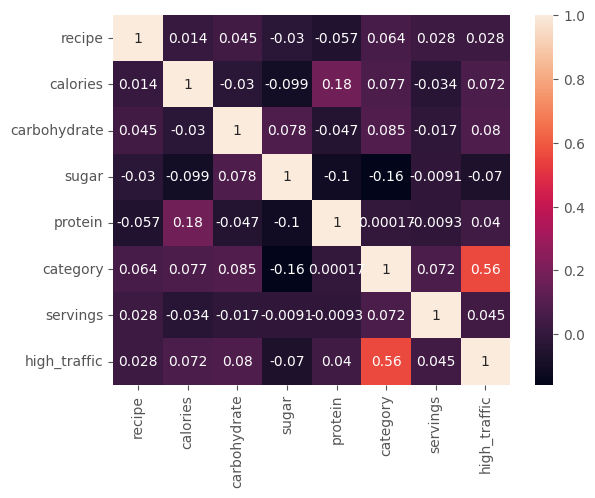

In [19]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot= True)
plt.show()

Finally, We see in the heat map below that our features doesn't have strong correlations, which indicates they are suitable for modelling; due to the fact that less related they are, more we can avoid redundancy.

# 3. Model Development

## 3.1 Model Selection Build

For model development we would first **Shuffle split** and using GridSearchCV we will comapre several classification and ensemble models. The reason for selecting these models is related to the fact that we have labeled data where we would invetigate whether we can achieve high website popularity or not. 

In addition in order to scale the data, **normalization** approach is selected over standardization due to the reasons of: firstly, the data is not normally distributed, and secondly there are range of units associated to each column. 

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [21]:
X= df_numerized.drop(["high_traffic","recipe"], axis=1)
y=df_numerized["high_traffic"]

scaler = MinMaxScaler()
scaler.fit(X)
X= scaler.fit_transform(X)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=100)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(804, 6) (143, 6) (804,) (143,)


In [23]:
algo = { 
    'logistic_regression': { 'model': LogisticRegression(), 'params':{'solver': ['newton-cg', 'lbfgs', 'liblinear'],
 'penalty': ['l2'], 'C': [100000, 1000, 100, 10, 1.0, 0.1, 0.01]}},
    'SVM': {'model':SVC(), 'params':{}},
    'decision_tree': {'model': DecisionTreeClassifier(), 'params':  {'criterion':['gini','entropy','log_loss'],'splitter':    ['best','random']} },
    'random_forest': {'model': RandomForestClassifier(), 'params': {'n_estimators': [1,5,10,20,50], 'criterion':['gini','entropy','log_loss']}},
    'ada_boost_classifier': {'model': AdaBoostClassifier(), 'params': {'n_estimators': [1,5,10,20,50], 'learning_rate' : [0.0001, 0.000001, 0.001, 0.01, 0.1, 1.0]}},
    'gradient_boosting_classifeir' : {'model': GradientBoostingClassifier(), 'params': {'n_estimators': [1,5,10,20,50,100]}},
    'xbgclassifier': {'model': XGBClassifier(), 'params': {'n_estimators': [1,5,10,20,50]} },
    'cat_boost_classifier': {'model': CatBoostClassifier(), 'params': {'iterations': [1]} },
    'knn_classifier' : {'model': KNeighborsClassifier() , 'params': {}}
    
}

In [24]:
score = []
CV = ShuffleSplit(n_splits=5, test_size=0.1, random_state=10)
#CV =RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)
for algo_name, mp in algo.items():
    grid = GridSearchCV(mp['model'],mp['params'], cv=CV, return_train_score=False)
    grid.fit(X,y)
    score.append({'model': algo_name, 'best_score': grid.best_score_, 'best_params': grid.best_params_})
score = pd.DataFrame(score)
score

Learning rate set to 0.5
0:	learn: 0.5869445	total: 46.6ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5854572	total: 769us	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5778056	total: 791us	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5769890	total: 789us	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5820475	total: 757us	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5768773	total: 675us	remaining: 0us


,model,best_score,best_params
0,logistic_regression,0.795789,"{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-..."
1,SVM,0.776842,{}
2,decision_tree,0.717895,"{'criterion': 'log_loss', 'splitter': 'random'}"
3,random_forest,0.764211,"{'criterion': 'log_loss', 'n_estimators': 10}"
4,ada_boost_classifier,0.795789,"{'learning_rate': 0.0001, 'n_estimators': 1}"
5,gradient_boosting_classifeir,0.787368,{'n_estimators': 20}
6,xbgclassifier,0.766316,{'n_estimators': 1}
7,cat_boost_classifier,0.781053,{'iterations': 1}
8,knn_classifier,0.726316,{}


## 3.2 Explanation of Grid Search Results

- According to table above highest score can be achieved equally by "logistic_regression" and "ada_boost_classifier" with score of approcximately 80%.
- "logisitic_regression" is chosen as a base model due to the simplicity, accuracy and efficiency.
- "ada_boosting_classifier" is selected as a comparison model. This is because although it can lead to high accuracy, it is more complicated and computationally demanding than logistic regression.

# 4. Model Evaluation

## 4.1 Visualization of Evaluation Parameters

In [25]:
from imblearn.combine import SMOTETomek

sm = SMOTETomek()
X_train_sm, y_train_sm = sm.fit_resample(X_train,y_train)
X_test_sm, y_test_sm = sm.fit_resample(X_test,y_test)

def model_build(model, X_train_model, X_test_model, y_train_model, y_test_model):
    model.fit(X_train_model, y_train_model)
    y_pred = model.predict(X_test_model)
    print(f"ROC AUC score of {model} is: {roc_auc_score(y_test_model,y_pred) * 100:.2f}")
    print(f"accuracy score is: {accuracy_score(y_test_model,y_pred) * 100:.2f}")
    print(f"and Mean Squared Error is: {mean_squared_error(y_test_model,y_pred):.3f}") 
    print(classification_report(y_test_model,y_pred))
    confusin= confusion_matrix(y_test_model, y_pred)
    print(sns.heatmap(confusin, annot=True, cmap='gist_earth'))


ROC AUC score of LogisticRegression() is: 81.17
accuracy score is: 81.17
and Mean Squared Error is: 0.188
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.86      0.74      0.80        77

    accuracy                           0.81       154
   macro avg       0.82      0.81      0.81       154
weighted avg       0.82      0.81      0.81       154

AxesSubplot(0.125,0.11;0.62x0.77)


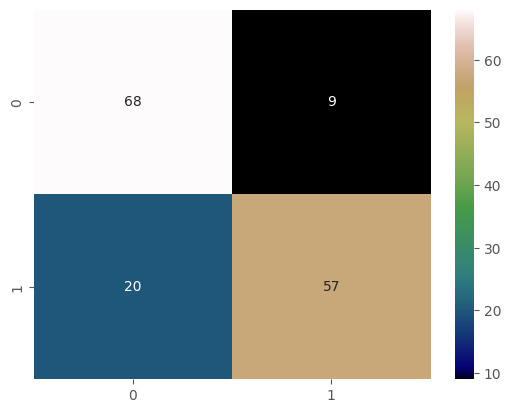

In [26]:
logistic = LogisticRegression()
model_build(logistic, X_train_sm, X_test_sm, y_train_sm,y_test_sm)

ROC AUC score of AdaBoostClassifier(learning_rate=0.0001, n_estimators=1) is: 81.82
accuracy score is: 81.82
and Mean Squared Error is: 0.182
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        77
           1       0.84      0.79      0.81        77

    accuracy                           0.82       154
   macro avg       0.82      0.82      0.82       154
weighted avg       0.82      0.82      0.82       154

AxesSubplot(0.125,0.11;0.62x0.77)


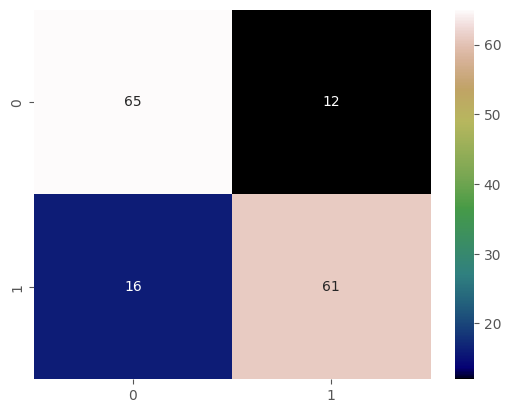

In [27]:
ada= AdaBoostClassifier(n_estimators=1, learning_rate=0.0001)
model_build(ada, X_train_sm, X_test_sm, y_train_sm,y_test_sm)

## 4.2 Results Analysis 

The metric of choice for model evaluation is decided to be **ROC AUC** score (the area under the ROC curve). This is due to its ability  to distinguish between classes and it's solidity against the classification threshold. However, for better evaluation we will look at other measures as well; namely, f1-score and confusion matrix results.

- We can see that our base model performs quite well, considering our metric of choice ROC AUC score, with the score of above 84%. This is above the requirement of 80% and almost the same of our comparison model with score of 85%.  
- We see that both models in term of recall and percision perform quite well with value of about 0.85. For f1-score our base model and comparison model reached values of 0.84 and 0.85 on average, which proves the ability of models in both precision and accuracy. We have also quite low false postives and false negatives. All of these suggest a good trade-off between bias and variance.
- Mean squared error of our base model and comparison model are respectively 0.151 and 0.158. We can see that both values are quite close to 0 indicating good performance of our model.

# 5. Business Metrics

To our answer the business questions of: a)which recipes will lead to high site traffic?
b) and prediction of high traffic recipes 80% of the time? **Logistic Regression** model is suggested without any hyperparameter tuning. And for our _business metrics_ it is suggested that **ROC AUC** score to be used due to its ability in distinguishing between the classes.

From our business analysis we can see that using these methods we can achieve score of **84%** to predict whether the model would lead to high website traffic or not. As we have achieved a score quite close to 100% (or 1) we can say that our models performs very well in distinguishing between the dishes with high traffic.

Furthermore we can say the **Vegetable, Potato and Pork** dishes are more popular than the rest. Other features, including the "serving", cannot lead to any understanding regarding the popularity of a specific recipe.

# 6. Conclusion

## 6.1 Summary

This project is started with validation of each column of the original dataset, including the data cleaning. Explanatory Data Analysis techniques are applied to gain insight, and using visualizations findings are depicted and explained. And after comparing several models, machine learning algorithm is applied, achieving a high accuracy scores. The major findings are as below:
Predict which recipes will lead to high traffic?
- By analyzing the historical data, we can conclude that those recipes which will lead to high traffic are:
    - Top 3 catgeories are "Vegetable", "Potato" & "Prok" with averages of high site traffic above 90%, in which "Vegetable", with an average of 99%, stands on top
    -  On the second level there are "Meat" and "One Dish Meal" with an average of around 75%
    -  The lowest of all is "Beverage" category with an average of 5%
 - There are no linear correlation between features other than "Category" and "high_traffic".
 - For the base model Logistic Regression is suggested due to it's accuracy of **84%** and simplicity.
    - As a result of hypertuning parameters we can say no parameter adjustment is required. 
- According to anlysis of confusion Matrix we can say that the model neither is overfitting nor underfitting.

## 6.2 Recommendations
Hereby, I would like to suggest some improvements for future:
- Using business metrics to follow whether the site traffic will increase.
- Breaking down the site traffic column to more categories to improve the predictions.
- Since there is a strong relation between categories and site traffic, I suggest that we breakdown the column to more categorization as it can improve our predictions.
- I recommend providing a chance for creating user account so that by keeping track of user activities we would enhance our prediction models.
- As the size of data increase we can improve the accuracy of model. Hence, more data collection is highly recommendable (in terms of number of items) 
- Providing the chance for rating by users or feedback on each recipe can be highly beneficial for model predictions. 